# impute missing data

In [25]:
#importing
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot

In [26]:
#data_wd = "C:/Users/Lenovo/Desktop/git/STAT4011_Project1/data/Lianjia_cleaned.csv"
data_wd = "Lianjia_cleaned.csv"
df1 = pd.read_csv(data_wd,na_values='?')
df1 = df1.apply(pd.to_numeric)

In [27]:
# summarize the number of rows with missing values for each column
for i in range(df1.shape[1]):
 n_miss = df1.iloc[0:df1.shape[0],i].isnull().sum()
 perc = n_miss / df1.shape[0] * 100
 print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 588 (2.8%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 575 (2.7%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 0 (0.0%)
> 9, Missing: 0 (0.0%)
> 10, Missing: 83 (0.4%)
> 11, Missing: 83 (0.4%)
> 12, Missing: 83 (0.4%)
> 13, Missing: 0 (0.0%)
> 14, Missing: 0 (0.0%)
> 15, Missing: 0 (0.0%)
> 16, Missing: 0 (0.0%)
> 17, Missing: 0 (0.0%)
> 18, Missing: 259 (1.2%)
> 19, Missing: 259 (1.2%)
> 20, Missing: 259 (1.2%)
> 21, Missing: 259 (1.2%)
> 22, Missing: 259 (1.2%)
> 23, Missing: 259 (1.2%)
> 24, Missing: 259 (1.2%)
> 25, Missing: 8 (0.0%)
> 26, Missing: 8 (0.0%)
> 27, Missing: 8 (0.0%)
> 28, Missing: 8 (0.0%)
> 29, Missing: 8 (0.0%)
> 30, Missing: 8 (0.0%)
> 31, Missing: 8 (0.0%)
> 32, Missing: 1 (0.0%)
> 33, Missing: 1 (0.0%)
> 34, Missing: 1 (0.0%)
> 35, Missing: 1 (0.0%)
> 36, Missing: 1 (0.0%)
> 37, Missing: 1 (0.0%)
> 38, Missing: 577 (2.7%)
> 39, Missing: 577 (2.7%)
> 40, Missing: 0 (0.0%)
>

In [28]:
X = df1.drop(columns=['price'])
y = df1['price']/10000 
log_y = np.log(y)
Xtrain,Xtest,ytrain,ytest=train_test_split(X,log_y,test_size=0.2,random_state=4011)
Xtrain.shape

(17039, 74)

In [30]:
# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in [1,3,5,7,9,15,18,24,27,30,33,36]]
strategies

['1', '3', '5', '7', '9', '15', '18', '24', '27', '30', '33', '36']

In [31]:
for s in strategies:
 # create the modeling pipeline
 pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestRegressor())])
 # evaluate the model
 cv = KFold(n_splits=5) 
 scores = cross_val_score(pipeline, Xtrain, ytrain, scoring='neg_root_mean_squared_error', cv=cv)
 # store results
 results.append(scores)
 print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))

>1 -0.196 (0.003)
>3 -0.190 (0.002)
>5 -0.189 (0.001)
>7 -0.189 (0.002)
>9 -0.189 (0.002)
>15 -0.189 (0.001)
>18 -0.189 (0.002)
>24 -0.189 (0.001)
>27 -0.189 (0.002)
>30 -0.189 (0.001)
>33 -0.189 (0.001)
>36 -0.189 (0.001)


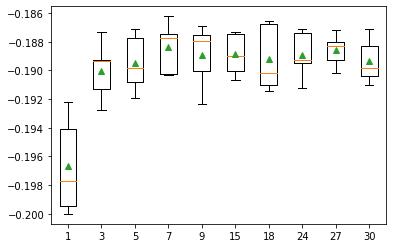

In [10]:
# plot performance of pipelines with different hyperparameters for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.savefig("impute.jpg")
#pyplot.savefig("C:/Users/Lenovo/Desktop/git/STAT4011_Project1/figures/impute.jpg")

In [11]:
my_imputer = KNNImputer(n_neighbors=7)
X_trained_filled = my_imputer.fit_transform(Xtrain)

# now transform test
X_test_filled = my_imputer.transform(Xtest)

In [12]:
my_scaler= StandardScaler()
X_train_standarded = my_scaler.fit_transform(X_trained_filled)
X_test_standarded = my_scaler.transform(X_test_filled)

In [13]:
X_train_standarded = pd.DataFrame(X_train_standarded)
X_test_standarded = pd.DataFrame(X_test_standarded)
ytrain = pd.DataFrame(ytrain)
ytest = pd.DataFrame(ytest)

In [14]:
train_data=ytrain.reset_index(drop=True).join(X_train_standarded)
test_data=ytest.reset_index(drop=True).join(X_test_standarded)
transformed_data=pd.concat([train_data, test_data], axis=0)

In [19]:
#df1.rename(columns={'price':'log_price'}, inplace = True)
colnames=df1.columns
transformed_data.columns=colnames
transformed_data.to_csv("Lianjia_tranformed.csv",index=False)
#transformed_data.to_csv("C:/Users/Lenovo/Desktop/git/STAT4011_Project1/data/Lianjia_transformed.csv",index=False)